# 0. Package Install 


---

주요 패키지



1.   ```Torch_geometric```
2.   ```Mendeleev```
3.   ```RDKit```

*숨겨진 셀들을 아래의 실행버튼을 통해서 보지 않고 수행될 수 있도록 해주세요*

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as gg 
sns.set_style("darkgrid", {"axes.facecolor": "gainsboro"})

In [70]:
file_path = "/content/drive/MyDrive/0_한동생활/2020-2.5 겨울방학/2_GNN/3_outputData/2021-02-16/16:59:06H_eGCN+lr=0.001"

train_log = pd.read_csv(file_path+"_Train_log.csv")
evaluation_log = pd.read_csv(file_path+"_evaluation_log.csv")

In [71]:
print("train_log :", train_log.columns.values)
print("evaluation_log :", evaluation_log.columns.values)


train_log : ['stage' 'epoch' 'loss']
evaluation_log : ['stage' 'epoch' 'MAE' 'Std' 'R2']


/usr/local/lib/python3.6/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 109 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)


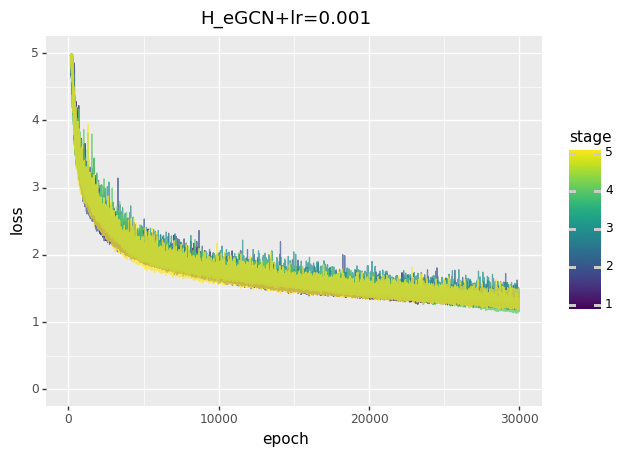

In [72]:
train_plot =gg.ggplot(train_log, gg.aes(x='epoch', y='loss', group='stage', color='stage'))
train_plot += gg.geom_line(alpha=0.7)
train_plot += gg.ylim(0,5)
train_plot += gg.ggtitle(file_path[len(file_path)-15:])

train_plot.draw()
None


In [94]:
y_min = evaluation_log[["MAE"]].values - evaluation_log[["Std"]].values
y_max = evaluation_log[["MAE"]].values + evaluation_log[["Std"]].values

print(y_min)
print(y_max.squeeze())

[-1.22722357 -3.09752138 -2.52806621 ... -1.56680232 -1.52419808
 -1.56036272]
[19.1102968  14.60183449 14.30390028 ...  7.20712457  7.04137016
  7.24099067]


/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:433: PlotnineWarning: position_stack : Removed 5995 rows containing missing values.
  data = self.position.setup_data(self.data, params)
/usr/local/lib/python3.6/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 18 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_bar : Removed 5 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


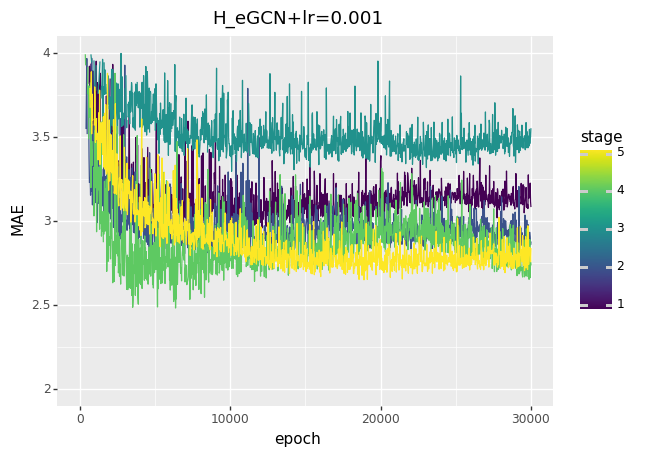

In [113]:
y_min = evaluation_log[["MAE"]] - evaluation_log[["Std"]]
y_max = evaluation_log[["MAE"]] + evaluation_log[["Std"]]

evaluation_log1 =gg.ggplot(evaluation_log, gg.aes(x='epoch', group='stage', color='stage'))
evaluation_log1 += gg.geom_line(gg.aes(y='MAE'))
evaluation_log1 += gg.geom_bar(gg.aes(y='Std'), stat="identity")
# evaluation_log1 += gg.geom_ribbon(gg.aes(ymax=3, ymin=evaludation_log[["MAE"]]), fill="gray", alpha=0.3)
evaluation_log1 += gg.ylim(2,4)
evaluation_log1 += gg.ggtitle(file_path[len(file_path)-15:])

evaluation_log1.draw()
None


/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ./trend_graph.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


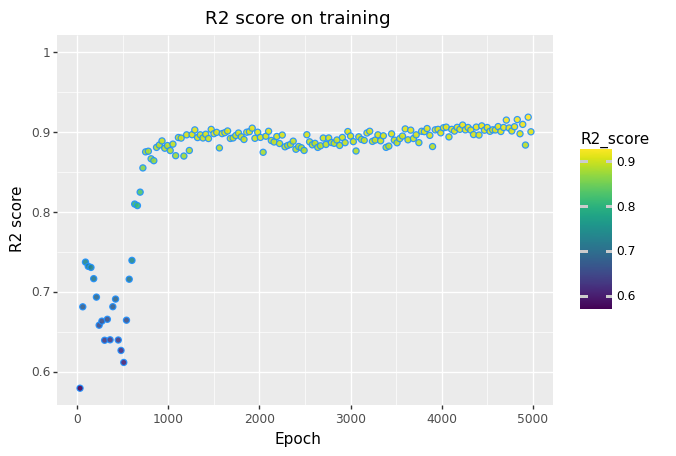

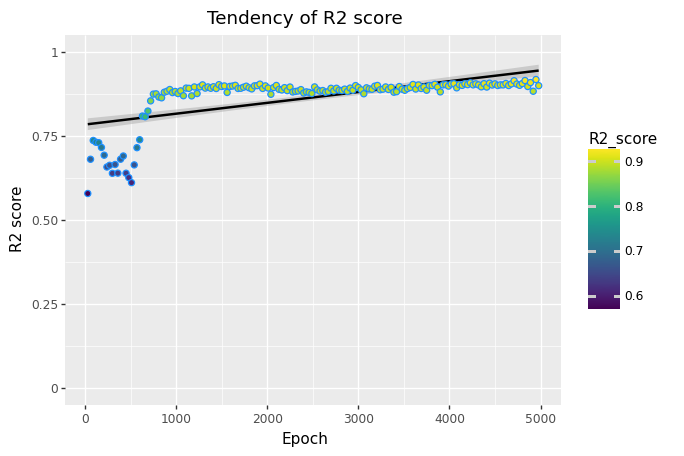

In [ ]:
#  https://blog.naver.com/nife0719/221000580841
df = pd.DataFrame(all_seq, columns=("Epoch","MAE","Std.","R2_score"))

# ggplot(df[["Epoch","R2_Score"]], aes(x="Epoch")) + geom_density(alpha=.1)
score_df = df[["Epoch","R2_score"]]

score_graph = gg.ggplot(score_df, aes(sample="R2_score", x="Epoch", y="R2_score",ymin=0.8, ymax=1, fill="R2_score")) 
score_graph += gg.geom_point(size=2,color="dodgerblue", alpha=0.9)# + geom_qq(size=2,color="blue", alpha=0.9)
score_graph += gg.ggtitle("R2 score on training")
score_graph += gg.labs(x="Epoch", y="R2 score")

trend_graph = gg.ggplot(score_df, aes(x="Epoch",y="R2_score",ymin=0.8, ymax=1, fill="R2_score")) 
# trend_graph += geom_qq(size=2,color="dodgerblue", alpha=0.5) 
# trend_graph += geom_qq_line(size=1.2,color="blue",alpha=0.8) 
# method ['lm', 'ols', 'wls', 'rlm', 'glm', 'gls', 'lowess', 'loess', 'mavg', 'gpr']
"""
'auto'       # Use loess if (n<1000), glm otherwise
            'lm', 'ols'  # Linear Model
            'wls'        # Weighted Linear Model
            'rlm'        # Robust Linear Model
            'glm'        # Generalized linear Model
            'gls'        # Generalized Least Squares
            'lowess'     # Locally Weighted Regression (simple)
            'loess'      # Locally Weighted Regression
            'mavg'       # Moving Average
            'gpr'        # Gaussian Process Regressor
"""
trend_graph += gg.geom_smooth(span=.3, method='gls') 
trend_graph += gg.geom_point(size=2, color="dodgerblue") 
trend_graph += gg.ggtitle("Tendency of R2 score")
trend_graph += gg.labs(x="Epoch", y="R2 score")
trend_graph += gg.ylim(0,1)

score_graph.draw()
trend_graph.draw()

In [ ]:
MAE_df = df[["MAE","Epoch"]]
MAE_df[" "] = "MAE"
MAE_df =MAE_df.rename(columns={"MAE":"value"})
Std_df = df[["Std.","Epoch"]]
Std_df[" "] = "Std."
Std_df =Std_df.rename(columns={"Std.":"value"})
value_df = pd.concat([MAE_df,Std_df], axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Test MAE: 3.2129	Test R2 score: 0.9042
--------------HyperParameter Info--------------
Batch : 32, init_lr : 0.0005, l2_coeff : 0.0, epoch : 5000
criterion : L1Loss(), hidden Channel : 256
Feature Num. : 12
-----------------------------------------------


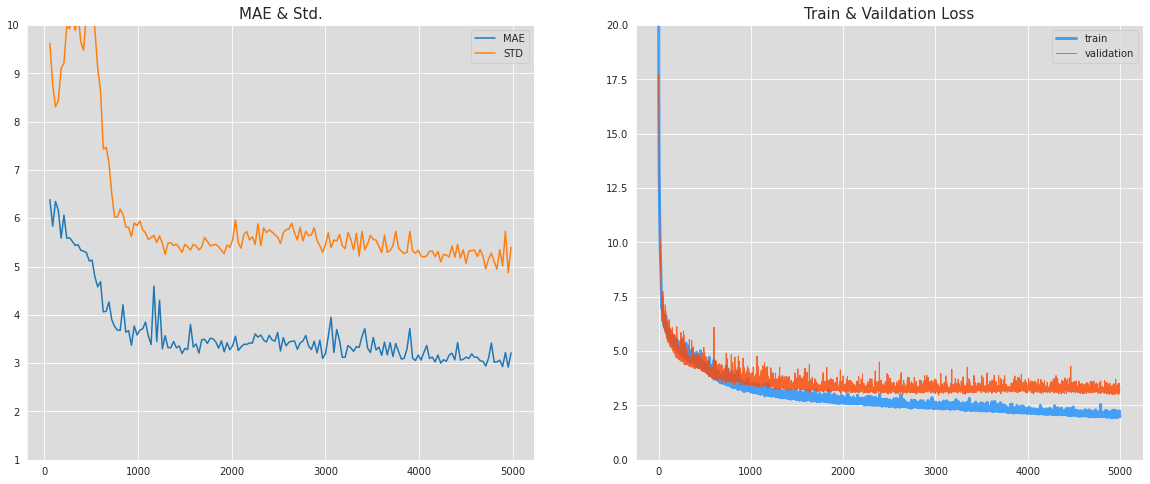

In [ ]:
# Test the trained GNN
preds = test(model, test_loader)
test_mae = np.mean(np.abs(test_targets - preds))
r2 = r2_score(test_targets, preds)
print('Test MAE: {:.4f}\tTest R2 score: {:.4f}'.format(test_mae, r2))
print("--------------HyperParameter Info--------------")
print("Batch : {}, init_lr : {}, l2_coeff : {}, epoch : {}".format(batch_size,init_lr,l2_coeff,n_epochs))
print("criterion : {}, hidden Channel : {}".format(criterion,256))
print("Feature Num. : {}".format(len(elem_feat_names)))
print("-----------------------------------------------")


plt.subplots(1,2,figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(all_seq[1:,0], all_seq[1:,1],label="MAE")
plt.plot(all_seq[1:,0], all_seq[1:,2], label="STD")
plt.ylim(1,10)
plt.title("MAE & Std.",size=15)
plt.legend()
plt.subplot(1,2,2)
# plt.plot(all_seq[1:,0], all_seq[1:,3], label="R2_score")
# plt.title("R2_Score on Training",size=15)
plt.plot(train_losses, label="train", linewidth=3, color="dodgerblue",alpha=0.8)
plt.plot(vali_losses, label="validation", linewidth=1,color="orangered",alpha=0.8)
plt.ylim(0,20)
plt.title("Train & Vaildation Loss",size=15)
plt.legend()

plt.show()

In [ ]:
# Save prediction results
pred_results = list()
for i in range(0, preds.shape[0]):
    pred_results.append([test_smiles[i], test_targets[i].item(), preds[i].item()])
df = pandas.DataFrame(pred_results)
df.columns = ['smiles', 'true_y', 'pred_y']
# df.to_excel('EGCN_Default.xlsx', index=False)
 